# The Sparks Foundation

# Data Science and Business Analytics Intern

## Author: Anwesha Datta

# Task 2: Prediction using Unsupervised ML



## Data Source: https://bit.ly/3kXTdox

## Problem Statement: From the given 'iris' dataset, predict the optimum number of clusters and represent it virtually


In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 

## Data Import

In [7]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLength(cm),SepalWidth(cm,PetalLength(cm),PetalWidth(cm),Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Removing the columns which are not required

In [8]:
df1=df.drop(['Id','Species'], axis=1)
df1

,SepalLength(cm),SepalWidth(cm,PetalLength(cm),PetalWidth(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Description of the data

In [9]:
df1.describe()


,SepalLength(cm),SepalWidth(cm,PetalLength(cm),PetalWidth(cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


###### Not much variation in the data, so scaling is not needed

## Defining the kmeans function with initialization as k-means++

In [92]:
kmeans=KMeans(n_clusters=2, init='k-means++')
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
kmeans.inertia_

152.36870647733906

## Fitting multiple k-means algorithms and storing the values in an empty list

Text(0, 0.5, 'Inertia')

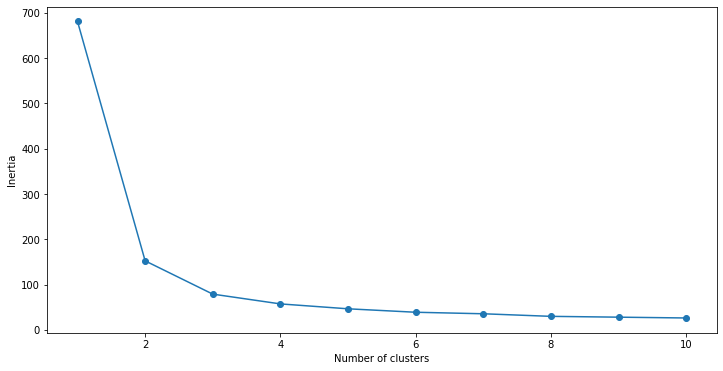

In [94]:
SSE = []
for cluster in range(1,11):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(df1)
    SSE.append(kmeans.inertia_)
    
frame = pd.DataFrame({'Cluster':range(1,11), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')


###### Number of clusters= 3 

## K means using 3 clusters and k-means++ initialization

In [95]:
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(df1)
pred=kmeans.predict(df1)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

## The value count of points in each of the above-formed clusters

In [96]:
frame = pd.DataFrame(df1)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    62
1    50
2    38
Name: cluster, dtype: int64

## Data visualisation

Text(0.5, 0, 'Petal length')

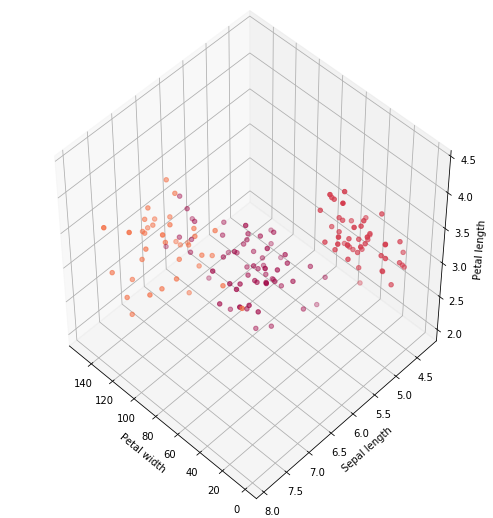

In [101]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
x = df.iloc[:, [0, 1, 2, 3]].values
ax.scatter(x[:,0],x[:,1],x[:,2],c=[plt.get_cmap("Spectral")(float(i)/10)for i in kmeans.labels_])
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")